# Analisis de archivos ab1 y obtener secuencias consenso
información  
https://biopython.org/wiki/SeqIO  
http://biopython.org/wiki/ABI_traces

In [26]:
from Bio import SeqIO, SeqRecord, Seq, AlignIO, pairwise2, SearchIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import IUPAC, generic_dna
from collections import defaultdict
import matplotlib.pyplot as plt
from io import StringIO
from Bio.Align import AlignInfo
from Bio.SubsMat.MatrixInfo import blosum62
from Bio.Blast import NCBIWWW, NCBIXML

In [2]:
def consenso2(sec1, sec2):
    if len(sec1)!=len(sec2):
        print("las secuencias no son de igual tamaño")
        return
    n=0
    secuencia= ""
    nucleotido=""
    for row in range(len(sec1)):
        n+=1
        if sec1[row]== sec2[row]:
            secuencia+= sec1[row]
            #print (sec1[row], end = "")
        else:
            if sec1[row]=="-" and sec2[row]!="-":
                nucleotido=sec2[row].lower()
            elif sec1[row]!="-" and sec2[row]=="-":
                nucleotido=sec1[row].lower()
            elif sec1[row]!= sec2[row]:
                if (sec1[row]=="A" and sec2[row]== "G") or (sec1[row]=="G" and sec2[row]== "A"):
                    nucleotido="R"
                elif (sec1[row]=="C" and sec2[row]== "T") or (sec1[row]=="T" and sec2[row]== "C"):
                    nucleotido="Y"
                elif (sec1[row]=="G" and sec2[row]== "C") or (sec1[row]=="C" and sec2[row]== "G"):
                    nucleotido="S"
                elif (sec1[row]=="A" and sec2[row]== "T") or (sec1[row]=="T" and sec2[row]== "A"):
                    nucleotido="W"
                elif (sec1[row]=="G" and sec2[row]== "T") or (sec1[row]=="T" and sec2[row]== "T"):
                    nucleotido="K"
                elif (sec1[row]=="A" and sec2[row]== "C") or (sec1[row]=="C" and sec2[row]== "A"):
                    nucleotido="M"
            else:
                print ("hay dos errores, posición",row ,sec1[row], sec2[row])
                secuencia += nucleotido
            #print ( nucleotido, end = "")
            secuencia+= nucleotido

        if n==93:
            #print()
            n=0
    return (secuencia)

In [11]:
def graficado(x1,x2):
    plt.figure(figsize=(16,4))
    plt.plot(trace['DATA9'], color='blue')
    plt.plot(trace['DATA10'], color='red')
    plt.plot(trace['DATA11'], color='green')
    plt.plot(trace['DATA12'], color='yellow')
    plt.xlim(x1,x2)  # se utiliza valores de 1000 como maximo
    plt.show()

In [3]:
def generoespecie(genesp):
    genero=genesp[:genesp.find(" ")]
    #print(genero)
    especie = genesp[genesp.find(" ")+1:]
    especie = especie[:especie.find(" ")]
    #print(especie)
    genesp1 = genero+" "+especie
    return(genesp1)

In [4]:
def gespecie(genesp):
    genero=genesp[:1]+"._"
    #print(genero)
    especie = genesp[genesp.find(" ")+1:]
    especie = especie[:especie.find(" ")]
    #print(especie)
    genesp1 = genero+especie
    return(genesp1)

In [5]:
cd ~/Desktop/pdi_molecular/data/ab1/

/Users/migueldelrio/Desktop/pdi_molecular/data/ab1


In [6]:
ls -lh *.ab1

-rwxr-xr-x  1 migueldelrio  staff   287K May 29 15:47 A2a-16S-F.ab1*
-rwxr-xr-x  1 migueldelrio  staff   291K May 29 15:47 A2a-16S-R.ab1*
-rwxr-xr-x  1 migueldelrio  staff   303K May 29 15:47 P1a-16S-F.ab1*
-rwxr-xr-x  1 migueldelrio  staff   294K May 29 15:47 P1a-16S-R.ab1*
-rwxr-xr-x  1 migueldelrio  staff   291K May 29 15:47 T1b-16SAR.ab1*
-rwxr-xr-x  1 migueldelrio  staff   292K May 29 15:47 T1b-16SBR.ab1*


# Para leer el archivo `ab1` se utiliza `SeqIO` con la opción `abi1`

In [7]:
record = SeqIO.read('P1a-16S-F.ab1', 'abi')
record

SeqRecord(seq=Seq('GCCGTGGATTTAATGGGCTCCGGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCG...TTG', IUPACUnambiguousDNA()), id='P1a-16S-F', name='P1a-16S-F', description='', dbxrefs=[])

# El archivo `ab1` contiene la información de la secuencia y del electroferograma.
## Graficado del electroferograma

In [8]:
record.annotations.keys()
record.annotations['abif_raw'].keys()
channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']
trace = defaultdict(list)

In [9]:
for c in channels:
    trace[c] = record.annotations['abif_raw'][c]

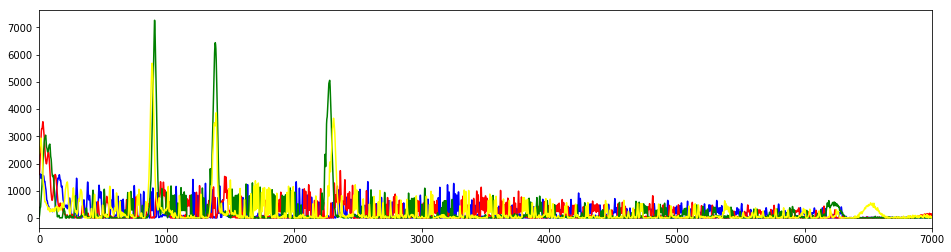

In [12]:
graficado (0,7000)

# se define un intervalo menor y se grafica por partes

In [13]:
intervalos = range(1000,8000,1000)
intervalos

range(1000, 8000, 1000)

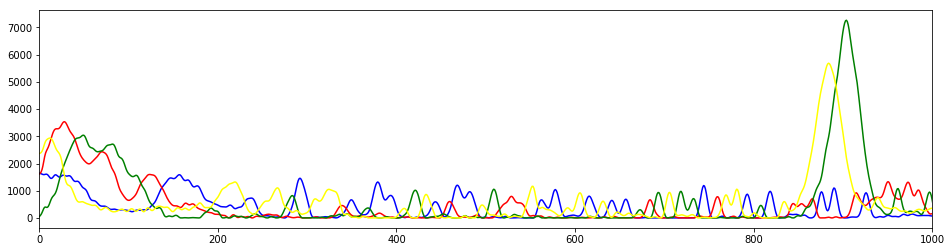

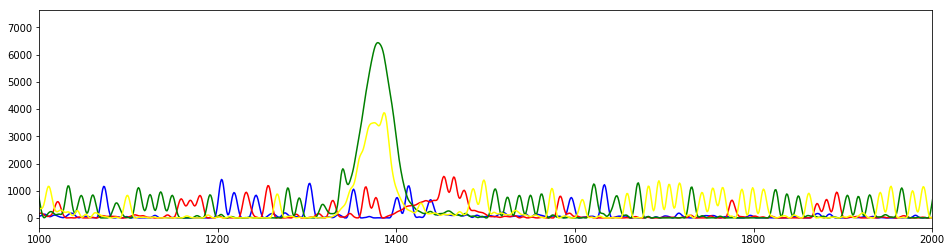

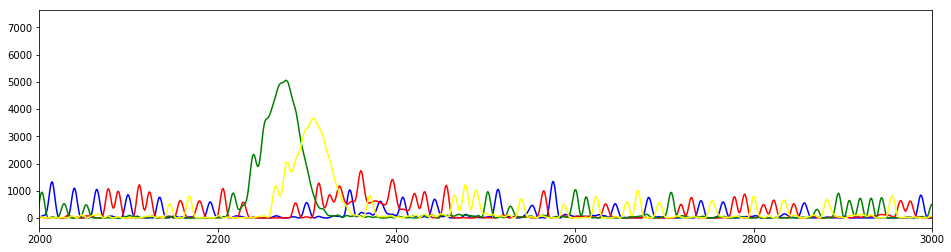

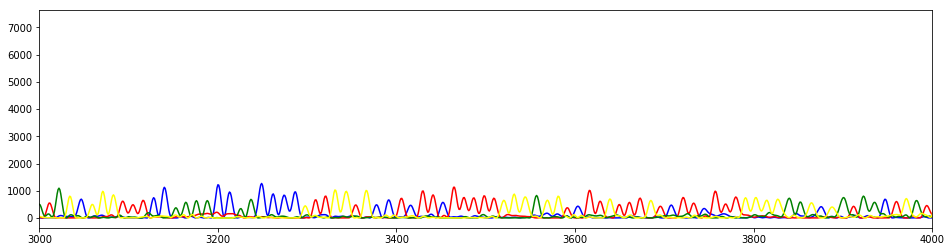

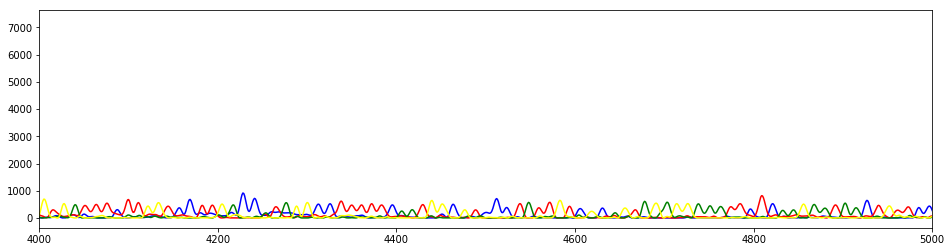

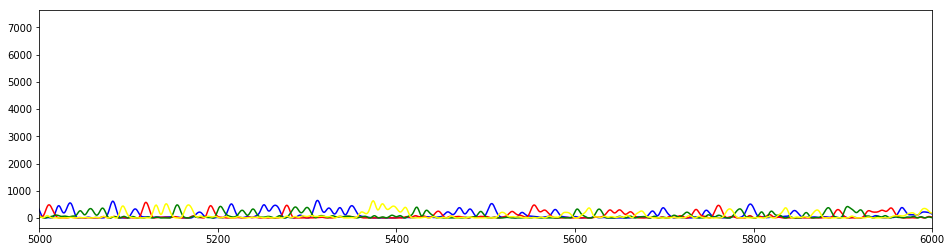

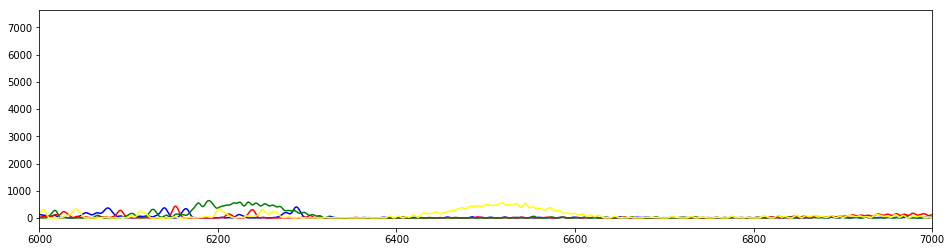

In [14]:
for intervalo in intervalos:
    graficado (intervalo-1000,intervalo)

# El archivo `ab1` también contiene información sobre la calidad de la señal en cada nucleótido, por lo que se pueden quitar regiones de baja calidad de la secuencia de interés.
# Eliminación de las regiones de baja calidad

# Se utilizarán ambas secuencias de un fragmento de interés.
### en este caso:
`P1a-16S-F.ab1`  
`P1a-16S-R.ab1`
# Secuencias con el iniciador sentido (forward) y antisentido (reverse)


In [15]:
recordtrimmed_F = SeqIO.read('P1a-16S-F.ab1', 'abi-trim')
recordtrimmed_R = SeqIO.read('P1a-16S-R.ab1', 'abi-trim')

# Se alinean ambos fragmentos para corroborar la secuencia

In [16]:
alignments = pairwise2.align.globalds(recordtrimmed_F.seq,recordtrimmed_R.seq.reverse_complement(), 
                                      blosum62, -10, -0.5)

# Se muestran los alineamientos obtenidos

In [17]:
for row in range(len(alignments)):
    print ("Alineamiento", row)
    print(pairwise2.format_alignment(*alignments[row]), "\n")

Alineamiento 0
--------------------------------------CGGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCGCGGTATCTTGACCGTGCAAAGGTAGCATAATCATTTGTCTTTTAAATGGAGACTTGTATGAACGGCGAAACCTTTTTCAGCTGTCTCCCCTCCCACCCTTTCAAATTTCCTCCTGTGTGAAGAAGCACAGATATTCCAGAAAGACGAGAAGACCCTGTCGAGCTTCAGCCGCTAAGCGAACAACAGTCTTTTTCAAGTATCGCCCAAAGGTTTTGGTTGGGGCAACCACGGAGAAGAAAAACCCTCCAGAACAAACAGAAGAAACCCCTTCGCTATTGACTACACTAAAGAACCAGGAACTGGTATCCGGAAAAAGTTACCGCAGGGATAACAGCGTCATCTCCTTTAAGAGTTCTTATTGACAAGGAGGTTTGCGACCTCGATGTTGGATTGGGGCCCCCTTAGGGTGCAGAAGCTCTAAACGGTTAGACTGTTCGTCTATTAAAGCGCTACGGGATCTGAGT
                                      |.||||||||||||||||||||||||||| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Seleccionar el mejor alineamiento en la siguiente celda como: 
`consenso2(alignments[x][0], alignments[x][1])`  
donde `x` es la secuencia seleccionada.
### en este caso se selecciona la # `1`

In [18]:
secuencia = consenso2(alignments[1][0], alignments[1][1])
print(secuencia)

aaaaaaaaaacatagccctttgaatatttaaaggggtcCSGCCTGCCCAGTGGCTCGAGGCTAAACGcGCCGCGGTATCTTGACCGTGCAAAGGTAGCATAATCATTTGTCTTTTAAATGGAGACTTGTATGAACGGCGAAACCTTTTTCAGCTGTCTCCCCTCCCACCCTTTCAAATTTCCTCCTGTGTGAAGAAGCACAGATATTCCAGAAAGACGAGAAGACCCTGTCGAGCTTCAGCCGCTAAGCGAACAACAGTCTTTTTCAAGTATCGCCCAAAGGTTTTGGTTGGGGCAACCACGGAGAAGAAAAACCCTCCAGAACAAACAGAAGAAACCCCTTCGCTATTGACTACACTAAAGAACCAGGAACTGGTATCCGGAAAAAGTTACCGCAGGGATAACAGCGTCATCTCCTTTAAGAGTTCTTATTGACAAGGAGGTTTGCGACCTCGATGTTGGATTGGGGCCCCCTTAGGGTGCAGAAGCTCTAAACGGTWagactgttcgtctattaaagcgctacgggatctgagt


# Las letras minúsculas indican que no hay nucleótidos en una de las dos secuencias
# Se utiliza el código IUPAC para designar variantes 

|Letra|nucleótidos|
|-----|-----------|
|R|A or G|
|Y|C or T|
|S|G or C|
|W|A or T|
|K|G or T|
|M|A or C|

# para los siguientes pasos, es necesario guardar la secuencia.
Explique qué es lo que hace el comando

In [20]:
secuencia_fas = SeqRecord(Seq(secuencia.upper()), id="P1a-16S", description="P1a-16S" )

# Recuerde que un archivo fasta contiene
`> identificador descriptor`  
`secuencia`

## Guardando la secuencia consenso con formato fasta

In [21]:
SeqIO.write(secuencia_fas, 'P1a-16S_con.fasta', 'fasta')

1

# verificando contenido de `P1a-16S_con.fasta`

In [22]:
!head P1a-16S_con.fasta

>P1a-16S
AAAAAAAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGCTCGAGG
CTAAACGCGCCGCGGTATCTTGACCGTGCAAAGGTAGCATAATCATTTGTCTTTTAAATG
GAGACTTGTATGAACGGCGAAACCTTTTTCAGCTGTCTCCCCTCCCACCCTTTCAAATTT
CCTCCTGTGTGAAGAAGCACAGATATTCCAGAAAGACGAGAAGACCCTGTCGAGCTTCAG
CCGCTAAGCGAACAACAGTCTTTTTCAAGTATCGCCCAAAGGTTTTGGTTGGGGCAACCA
CGGAGAAGAAAAACCCTCCAGAACAAACAGAAGAAACCCCTTCGCTATTGACTACACTAA
AGAACCAGGAACTGGTATCCGGAAAAAGTTACCGCAGGGATAACAGCGTCATCTCCTTTA
AGAGTTCTTATTGACAAGGAGGTTTGCGACCTCGATGTTGGATTGGGGCCCCCTTAGGGT
GCAGAAGCTCTAAACGGTWAGACTGTTCGTCTATTAAAGCGCTACGGGATCTGAGT


### Explique el contenido del archivo

In [23]:
pwd

'/Users/migueldelrio/Desktop/pdi_molecular/data/ab1'

## Una vez obtenida la secuencia, se procede a buscarla en la bases de datos del NCBI, se puede hacer directamente en la página de blast o por búsqueda desde el `Jupyter`.

In [24]:
ls *.fasta

P1a-16S_con.fasta       P1a_alineamiento.fasta


# Para buscar la secuencia en el NCBI, se usa NCBIWWW

### Se busca en la base de datos de nucleótidos, el formato del archivo es _fasta_ (`record.format`) y el número de secuencias que regresará es de 10 (por omisión son 50, `hitlist_size`)

In [27]:
record = SeqIO.read("P1a-16S_con.fasta", format="fasta")
result_handle = NCBIWWW.qblast("blastn", "nt", record.format("fasta"), hitlist_size = 10)

### Se guarda el archivo en formato `xml` y se cierra el archivo recibido (result_handle.close())

In [29]:
with open("P1a.xml", "w") as out_handle:
    out_handle.write(result_handle.read())

result_handle.close()

In [30]:
result_handle = open("P1a.xml")
blast_record = NCBIXML.read(result_handle)

### Si se desea un valor de corte definido (E_VALUE_THRESH) se ejecuta la siguiente celda

# Si no se desea un valor de corte, se ejecuta la siguiente celda para observar los resultados del blast:

In [31]:
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print("****Alignment****")
        print("sequence:", alignment.title)
        print("length:", alignment.length)
        print("e value:", hsp.expect)
        print(hsp.query[0:75] + "...")
        print(hsp.match[0:75] + "...")
        print(hsp.sbjct[0:75] + "...")

****Alignment****
sequence: gi|159461607|gb|EU220800.1| Holothuria grisea voucher UF 4460A 16S ribosomal RNA gene, partial sequence; mitochondrial
length: 1113
e value: 0.0
AAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCGCGGTATCT...
|||||||||||||||||||||||||||||| ||| ||||||||||||||||||||||||||| ||||||||||||...
AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCTGCCCAGTGGCTCGAGGCTAAACG-GCCGCGGTATCT...
****Alignment****
sequence: gi|159461608|gb|EU220801.1| Holothuria kefersteini voucher UF 3359 16S ribosomal RNA gene, partial sequence; mitochondrial
length: 1118
e value: 0.0
AAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCGCGGTATCT...
|||||||||||||||||||||||||||||| ||| |||||||||||||||| |||||||||| ||||||||||||...
AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCTGCCCAGTGGCTCAAGGCTAAACG-GCCGCGGTATCT...
****Alignment****
sequence: gi|342850957|gb|JN207498.1| Holothuria inornata isolate A32 voucher UNAM-ICML 5.77.133 16S ribosomal RNA gene, partial sequence; mitochondrial
lengt

# Para guardar las secuencias resultantes del blast se ejecuta la siguiente celda. 
## Se almacenan las secuencias en la variable `secuencias`

In [32]:
# con valor de corte
E_VALUE_THRESH = 0.001
secuencias = []
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
         if hsp.expect < E_VALUE_THRESH:
            print("****Alignment****")
            print("sequence:", alignment.title)
            print("length:", alignment.length)
            print("e value:", hsp.expect)
            print(hsp.query[0:75] + "...")
            print(hsp.match[0:75] + "...")
            print(hsp.sbjct[0:75] + "...")
            linea =SeqRecord(Seq(hsp.sbjct), id=gespecie(alignment.hit_def)+
                             "_"+alignment.accession , description=generoespecie(alignment.hit_def))
            secuencias.append(linea)

****Alignment****
sequence: gi|159461607|gb|EU220800.1| Holothuria grisea voucher UF 4460A 16S ribosomal RNA gene, partial sequence; mitochondrial
length: 1113
e value: 0.0
AAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCGCGGTATCT...
|||||||||||||||||||||||||||||| ||| ||||||||||||||||||||||||||| ||||||||||||...
AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCTGCCCAGTGGCTCGAGGCTAAACG-GCCGCGGTATCT...
****Alignment****
sequence: gi|159461608|gb|EU220801.1| Holothuria kefersteini voucher UF 3359 16S ribosomal RNA gene, partial sequence; mitochondrial
length: 1118
e value: 0.0
AAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGCTCGAGGCTAAACGCGCCGCGGTATCT...
|||||||||||||||||||||||||||||| ||| |||||||||||||||| |||||||||| ||||||||||||...
AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCTGCCCAGTGGCTCAAGGCTAAACG-GCCGCGGTATCT...
****Alignment****
sequence: gi|342850957|gb|JN207498.1| Holothuria inornata isolate A32 voucher UNAM-ICML 5.77.133 16S ribosomal RNA gene, partial sequence; mitochondrial
lengt

# Para anexar la secuencia sometida al blast se corrobora que la variable `record` tenga la información de la secuencia de interés 

In [33]:
### verificando que se tiene el registro `record`. En caso de que no esté, se ejecuta la siguiente línea
#record = SeqIO.read("P1a-16S_con.fasta", format="fasta")
record

SeqRecord(seq=Seq('AAAAAAAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCTGCCCAGTGGC...AGT', SingleLetterAlphabet()), id='P1a-16S', name='P1a-16S', description='P1a-16S', dbxrefs=[])

### se agrega la secuencia de interés a la variable `secuencias`

In [34]:
secuencias.append(record)

In [35]:
SeqIO.write(secuencias, 'P1a_alineamiento.fasta', 
            'fasta')

11

### Verificando el contenido del archivo

In [36]:
!head 'P1a_alineamiento.fasta'

>H._grisea_EU220800 Holothuria grisea
AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCTGCCCAGTGGCTCGAGGCTAAA
CG-GCCGCGGTATCTTGACCGTGCAAAGGTAGCATAATCATTTGTCTTTTAAATGGAGAC
TTGTATGAACGGCGAAACCTTTTTCAGCTGTCTCCCCTCCCACCCTTTCAAATTTCCTCC
TGTGTGAAGAAGCACAGATATTCCAGAAAGACGAGAAGACCCTGTCGAGCTTCAGCCGCT
AAGCGAACA---GTCTTTTTCAAGTATCGCCCAAAGGCTTTGGTTGGGGCAACCACGGAG
AAGAAAAACCCTCCAGAACAAACAGAAGAAAACCCTTCGCTATTGACTACACTAAAGAAC
CAGGAACTGGTATTCGGAAAAAGTTACCGCAGGGATAACAGCGTCATCTCCTTTAAGAGT
TCTTATTGACAAGGAGGTTTGCGACCTCGATGTTGGATTGGGGCCCCCTTAGGGTGCAGA
AGCTCTAAACGGTTAGACTGTTCGTCTATTAAAGCCCT


### importando paquetes

In [37]:
import os, pylab
from Bio.Align.Applications import ClustalwCommandline
from Bio import pairwise2, SeqIO, AlignIO, Phylo


### Se debe tener instalado el ClustalW para el SO que esté utilizando, en iOS y linux se puede instalar desde anaconda (conda), pero en Windows, se requeire instalar [clustalw2](http://www.clustal.org/clustal2/) y se debe conocer el directorio en donde está instalado

In [ ]:
# Windows
ls "c:/Program Files (x86)/ClustalW2"

In [ ]:
# 

## Alineamiento con `ClustalW` de las secuencias obtenidas con el blast y la de interés

In [ ]:
#windows ejecutar, una vez que se haya instalado el clustalw
clustalw_exe = r"C:/Program Files (x86)/ClustalW2/clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="P1a_alineamiento.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [38]:
#iOS ejecutar
clustalw_exe = r"/Users/migueldelrio/Desktop/analisis/scripts/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="P1a_alineamiento.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [39]:
ls 

A2a-16S-F.ab1*          P1a-16S_con.fasta       P1a_alineamiento.fasta
A2a-16S-R.ab1*          P1a.xml                 T1b-16SAR.ab1*
P1a-16S-F.ab1*          P1a_alineamiento.aln    T1b-16SBR.ab1*
P1a-16S-R.ab1*          P1a_alineamiento.dnd


# Visualización de las secuencias alineadas

In [40]:
alignments = AlignIO.parse("P1a_alineamiento.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 11 rows and 541 columns
-----AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCT...--- H._grisea_EU220800
AAAAAAAAAACATAGCCCTTTGAATATTTAAAGGGGTCCSGCCT...AGT P1a-16S
------------TAGCCCTTTGAATATTTAAAGGG-TCCTGCCT...--- H._inornata_JN207498
-------------AGCCCTTTGAATATTTAAAGGG-TCCTGCCT...--- H._inornata_KY321306
-----AAAAACATAGCCCTTTGAATATTTAAAGGG-TCCCGCCT...--- H._kefersteini_EU220801
-----AAAAACATAGCCCTCTGAATCTATAAAGGG-TCCCGCCT...--- H._poli_LC176661
-----AAAAACATAGCCCTCTGAATCTATAAAGGG-TCCCGCCT...--- H._poli_LC176658
-----AAAAACATAGCCCTCTGAATCTATAAAGGG-TCCCGCCT...--- H._poli_LC176659
-----AAAAACATAGCCCTCTGAATCTATAAAGGG-TCCCGCCT...--- H._poli_LC176660
-----AAAAACATAGCCCCTTGAATATCTAAAGGG-TCCCGCCT...AGT H._arenicola_MK564644
-----AAAAACATAGCCCCTTGAATATTTAAAGGG-TCCCGCCT...AGT H._mexicana_EU822443



# Visualización del árbol con caracteres ASCII

In [41]:
# para visualizar el árbol generado en formato ascii, se ve el contenido del archivo .dnd
tree = Phylo.read("P1a_alineamiento.dnd", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

                                             , H._grisea_EU220800
                               ______________|
                              |              |_____ P1a-16S
                       _______|
                      |       |              , H._kefersteini_EU220801
                      |       |______________|
                      |                      |  , H._inornata_JN207498
  ____________________|                      |__|
 |                    |                         | H._inornata_KY321306
 |                    |
 |                    |  ____________________________ H._mexicana_EU822443
 |                    |_|
 |                      |_________________________ H._arenicola_MK564644
 |
 | H._poli_LC176660
 |
_| H._poli_LC176659
 |
 | H._poli_LC176661
 |
 | H._poli_LC176658



# Visualización del árbol dibujado

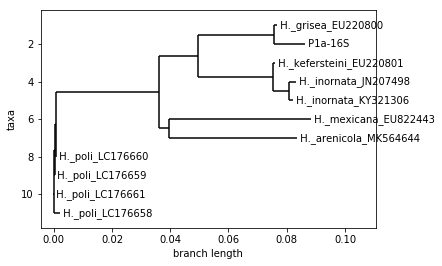

In [42]:
tree.rooted = True
Phylo.draw(tree)